In [1]:
# Bibliotecas
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importando dados
#data = pd.read_csv('expectativa_vida.csv')

In [3]:
# Tratando
#df = pd.DataFrame()
#df['Países'] = data['Country Name']
#df['Anos'] = data['Year']
#df['Cod país'] = data['Country Code']
#df['Expectativa de vida'] = data['Life Expectancy World Bank']
#df['Região'] = data['Region']
#df['Grupo de renda'] = data['IncomeGroup']

In [4]:
# Salvando
#df.to_csv('mapa.csv', index=False)

In [5]:
df = pd.read_csv('mapa.csv')

In [6]:
df

,Países,Anos,Cod país,Expectativa de vida,Região,Grupo de renda
0,Afghanistan,2001,AFG,56.308,South Asia,Low income
1,Angola,2001,AGO,47.059,Sub-Saharan Africa,Lower middle income
2,Albania,2001,ALB,74.288,Europe & Central Asia,Upper middle income
3,Andorra,2001,AND,NaN,Europe & Central Asia,High income
4,United Arab Emirates,2001,ARE,74.544,Middle East & North Africa,High income
...,...,...,...,...,...,...
3301,Vanuatu,2019,VUT,70.474,East Asia & Pacific,Lower middle income
3302,Samoa,2019,WSM,73.321,East Asia & Pacific,Lower middle income
3303,South Africa,2019,ZAF,64.131,Sub-Saharan Africa,Upper middle income
3304,Zambia,2019,ZMB,63.886,Sub-Saharan Africa,Low income


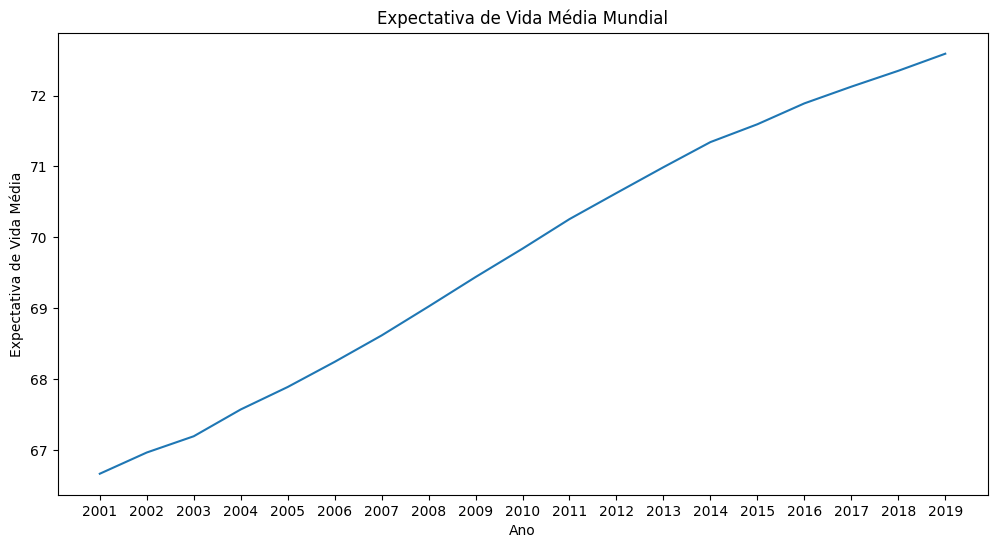

In [7]:
mean_life_expectancy_per_year = df.groupby('Anos')['Expectativa de vida'].mean().reset_index()

#Gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_life_expectancy_per_year, x='Anos', y='Expectativa de vida')
plt.title('Expectativa de Vida Média Mundial')
plt.xlabel('Ano')
plt.ylabel('Expectativa de Vida Média')
plt.xticks(mean_life_expectancy_per_year['Anos']) 
plt.grid(True)
plt.grid(False)
plt.show()

In [8]:
data = pd.read_csv('mapa.csv')

# Agrupando os dados por ano e grupo de renda para obter a média da expectativa de vida
grouped_data = data.groupby(['Anos', 'Grupo de renda'])['Expectativa de vida'].mean().reset_index()

# Dashboard
fig = px.bar(grouped_data, 
             x='Grupo de renda', 
             y='Expectativa de vida', 
             animation_frame='Anos', 
             animation_group='Grupo de renda', 
             range_y=[0, 100], 
             title='Expectativa de Vida Média por Grupo de Renda ao Longo dos Anos',
             labels={'Expectativa de vida': 'Expectativa de Vida Média', 'Grupo de renda': 'Grupo de Renda'},
             color='Grupo de renda',
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(yaxis=dict(title='Expectativa de Vida Média'),
                  xaxis=dict(title='Grupo de Renda'),
                  title={'text': 'Expectativa de Vida Média por Grupo de Renda ao Longo dos Anos', 'x': 0.5},
                  uniformtext_minsize=8, uniformtext_mode='hide')

fig.update_traces(texttemplate='%{y:.2f}', textposition='outside', textfont=dict(color='white'))

fig.show()


In [9]:
import plotly.express as px
import pandas as pd
import imageio
from PIL import Image

In [10]:
data = pd.read_csv('mapa.csv')

#Tratando os dados para compatibilidade 
average_life_expectancy_by_country_year = data.groupby(['Anos', 'Países'])['Expectativa de vida'].mean().reset_index()
average_life_expectancy_by_country_year = average_life_expectancy_by_country_year.rename(columns={'Anos': 'Year', 'Países': 'Country', 'Expectativa de vida': 'Life Expectancy'})

# Dashboard 
fig = px.choropleth(
    average_life_expectancy_by_country_year,
    locations='Country',
    locationmode='country names',
    color='Life Expectancy',
    color_continuous_scale=px.colors.sequential.Viridis,  
    title='Expectativa de Vida Média por País',
    labels={'Life Expectancy': 'Expectativa de Vida'},
    animation_frame='Year',  
    width=1200,  
    height=800   
)

fig.update_layout(
    title={
        'text': 'Dashboard da Expectativa de Vida por País',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    geo=dict(
        showcoastlines=True,
        coastlinecolor="Black",
        showland=True,
        landcolor="white"
    )
)

fig.show()
